# <center>Malria Disease Prediction</center>

## Overview:
Malaria is a life-threatening disease caused by parasites transmitted through the bite of infected female Anopheles mosquitoes. Symptoms typically include fever, chills, and flu-like illness, and if left untreated, it can lead to severe complications and death, particularly in children under five and pregnant women. Prevention strategies include the use of insecticide-treated bed nets, indoor residual spraying, and antimalarial medications. Malaria remains a significant public health challenge, particularly in tropical and subtropical regions of the world.

* We are trying to detect whether the cell/tissue is Infected or not.
## Dataset Information:

Malaria Infected Tissues Dataset - [Kaggle - Malaria Disease Detection](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data)

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.

### Training : Testing ::   22048 : 5510

# 1. Importing required libraries
* ```Numpy```: A fundamental package for scientific computing in Python. It provides support for multidimensional arrays, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used in numerical and scientific computing tasks, including data manipulation, linear algebra, statistics, and signal processing.

* ```Pandas```: A powerful library for data manipulation and analysis in Python. It offers data structures and functions for working with structured data, primarily in the form of dataframes. Dataframes are two-dimensional labeled arrays capable of holding heterogeneous data types. Pandas provides tools for reading and writing data from various file formats, reshaping and transforming data, and performing data analysis tasks such as grouping, filtering, and aggregation.

* ```Matplotlib```: A plotting library for creating visualizations in Python. It provides a MATLAB-like interface for generating a wide range of static, interactive, and animated plots. Matplotlib is highly customizable and supports various plot types, including line plots, scatter plots, bar charts, histograms, and heatmaps.

* ```TensorFlow```: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models at scale.

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 2. Data Preproceessing

### 2.1 Displaying Uninfected and Infected Cell tissues

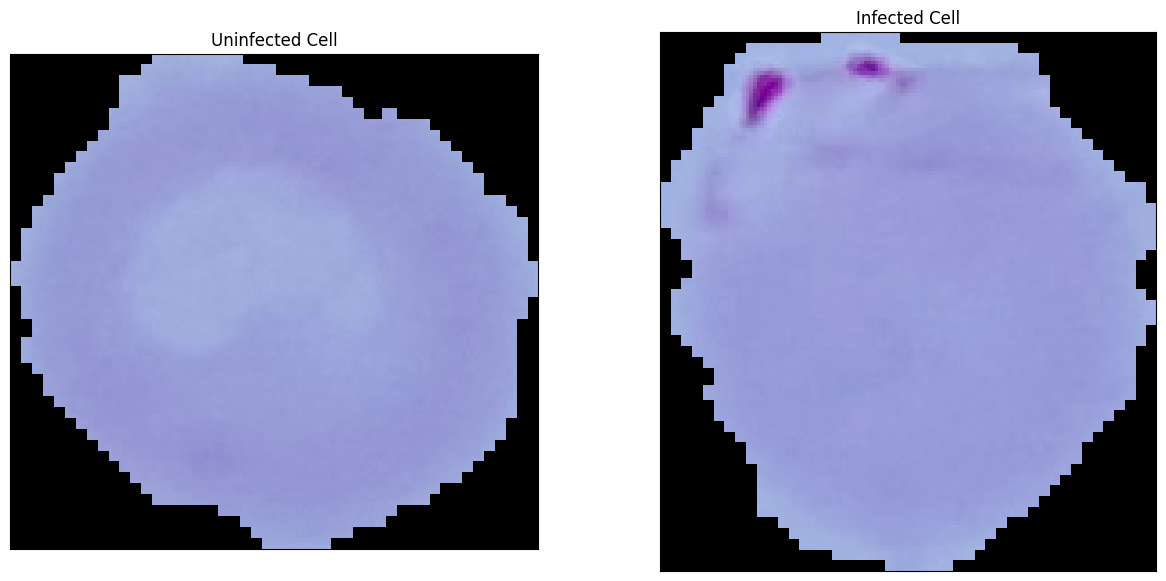

In [2]:
import cv2
upic='C:/Users/prajw/Downloads/archive/Dataset/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='C:/Users/prajw/Downloads/archive/Dataset/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### 2.2 Training and Testing Data Preparation

In [3]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [4]:
trainDatagen = datagen.flow_from_directory(directory='C:/Users/prajw/Downloads/archive/Dataset/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [5]:
valDatagen = datagen.flow_from_directory(directory='C:/Users/prajw/Downloads/archive/Dataset/cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# 3. Modelling

### 3.1 Convolutional Neural Networks Model Training

In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - 38s 24ms/step - loss: 0.5782 - accuracy: 0.6745 - val_loss: 0.1920 - val_accuracy: 0.9283
Epoch 2/20
1378/1378 [==============================] - 33s 24ms/step - loss: 0.1897 - accuracy: 0.9409 - val_loss: 0.1791 - val_accuracy: 0.9374
Epoch 3/20
1378/1378 [==============================] - 34s 25ms/step - loss: 0.1623 - accuracy: 0.9524 - val_loss: 0.1672 - val_accuracy: 0.9466
Epoch 4/20
1378/1378 [==============================] - 34s 25ms/step - loss: 0.1506 - accuracy: 0.9542 - val_loss: 0.1711 - val_accuracy: 0.9436
Epoch 5/20
1378/1378 [==============================] - 38s 27ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.1779 - val_accuracy: 0.9452


In [11]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

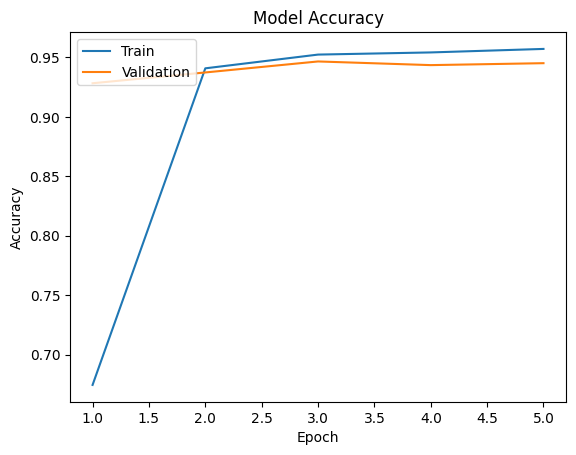

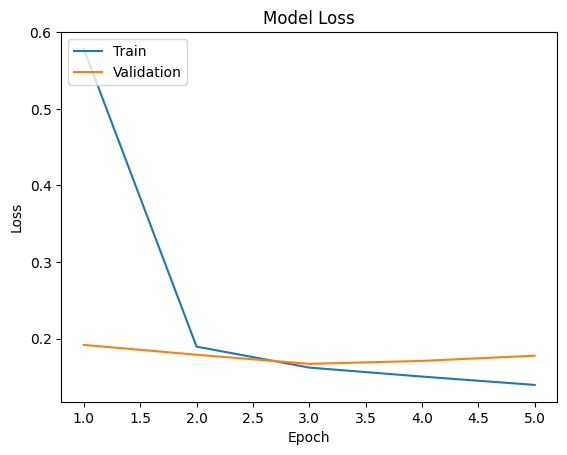

In [12]:
plotLearningCurve(history,5)

In [13]:
model.save("malaria.h5")